# <font color=#3A86FF>Données nutritionnelles - Nettoyage </font>

## Sommaire

* [Chargement des donnees](#Chargement-des-donnees)
* [Etude du jeu de donnees](#Etude-du-jeu-de-donnees)
* [Valeurs manquantes](#Valeurs-manquantes)
    * [Pourcentage valeurs manquantes](#Pourcentage-valeurs-manquantes)
    * [Graphique taux valeurs manquantes](#Graphique-taux-valeurs-manquantes)
* [Donnees avec moins de 80% de NA](#Donnees-sous-seuil-de-valeurs-manquantes)
* [Donnees avec filtrage des colonnes non significatives](#Donnees-avec-filtrage-des-colonnes-non-significatives)
* [Ecriture fichier CSV](#Ecriture-fichier-CSV)
* [RAF : Questions a developper](#Reste-a-faire)

## <font color=#FB5607>Chargement des donnees</font>

In [1]:
import pandas as pd
import time

now = time.time()
df = pd.read_csv("../Dataset/fr.openfoodfacts.org.products.csv", encoding="utf-8",sep="\t", low_memory=False)

## <font color=#FB5607>Etude du jeu de donnees</font>

*Obtenons un aperçu aléatoire des données (8 lignes):*

In [2]:
df.sample(10)

,code,url,creator,created_t,created_datetime,last_modified_t,last_modified_datetime,product_name,generic_name,quantity,...,ph_100g,fruits-vegetables-nuts_100g,collagen-meat-protein-ratio_100g,cocoa_100g,chlorophyl_100g,carbon-footprint_100g,nutrition-score-fr_100g,nutrition-score-uk_100g,glycemic-index_100g,water-hardness_100g
246663,3596710400454,http://world-fr.openfoodfacts.org/produit/3596...,openfoodfacts-contributors,1443812772,2015-10-02T19:06:12Z,1481014279,2016-12-06T08:51:19Z,Sirop de menthe,NaN,50 cl,...,NaN,NaN,NaN,NaN,NaN,NaN,20.0,13.0,NaN,NaN
289780,7610848729853,http://world-fr.openfoodfacts.org/produit/7610...,openfoodfacts-contributors,1460660485,2016-04-14T19:01:25Z,1490651297,2017-03-27T21:48:17Z,Muesli aux baies,NaN,500g,...,NaN,NaN,NaN,NaN,NaN,NaN,-4.0,-4.0,NaN,NaN
30679,0035826083388,http://world-fr.openfoodfacts.org/produit/0035...,usda-ndb-import,1489078363,2017-03-09T16:52:43Z,1489078363,2017-03-09T16:52:43Z,Corn Oil,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
81602,0072718601251,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489076290,2017-03-09T16:18:10Z,1489076290,2017-03-09T16:18:10Z,"Pure, Orange Juice",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
55948,0043000050835,http://world-fr.openfoodfacts.org/produit/0043...,usda-ndb-import,1489070893,2017-03-09T14:48:13Z,1489070893,2017-03-09T14:48:13Z,"Temptations Pie Snacks, French Silk Pie",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,6.0,6.0,NaN,NaN
142022,0755355007326,http://world-fr.openfoodfacts.org/produit/0755...,usda-ndb-import,1489073791,2017-03-09T15:36:31Z,1489073792,2017-03-09T15:36:32Z,"Avocado Oil Gourmet Chips, Barbecue",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,8.0,8.0,NaN,NaN
211681,3256225720385,http://world-fr.openfoodfacts.org/produit/3256...,elo44620,1474459636,2016-09-21T12:07:16Z,1474470657,2016-09-21T15:10:57Z,Crêpe fourrage à la fraise,NaN,256 g,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168460,0868654154209,http://world-fr.openfoodfacts.org/produit/0868...,usda-ndb-import,1489075159,2017-03-09T15:59:19Z,1489075160,2017-03-09T15:59:20Z,Candy Corn,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,16.0,16.0,NaN,NaN
79557,0072220004502,http://world-fr.openfoodfacts.org/produit/0072...,usda-ndb-import,1489095024,2017-03-09T21:30:24Z,1489095025,2017-03-09T21:30:25Z,Potato Rolls,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,NaN,NaN
240936,3564700006894,http://world-fr.openfoodfacts.org/produit/3564...,kiliweb,1487615237,2017-02-20T18:27:17Z,1487615237,2017-02-20T18:27:17Z,Abricots Au Sirop Marque Repere,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,2.0,2.0,NaN,NaN


*Quelle taille fait le jeu de données?*

In [3]:
print(f"{df.shape} (lignes,col) - taille: {df.size} (nb elements)")

(320772, 162) (lignes,col) - taille: 51965064 (nb elements)


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 320772 entries, 0 to 320771
Columns: 162 entries, code to water-hardness_100g
dtypes: float64(106), object(56)
memory usage: 396.5+ MB


*Voyons quelles sont les 162 colonnes et leur type?*

In [5]:
pd.set_option('display.max_rows', 162)
df.dtypes.head(10)

code                      object
url                       object
creator                   object
created_t                 object
created_datetime          object
last_modified_t           object
last_modified_datetime    object
product_name              object
generic_name              object
quantity                  object
dtype: object

## <font color=#FB5607>Valeurs manquantes</font>

*A présent, voyons combien de valeurs manquantes il y a par colonne*

In [6]:
# df.isna().sum() est de type Series
sCountNA=df.isna().sum()
sCountNA.head(10)

code                          23
url                           23
creator                        2
created_t                      3
created_datetime               9
last_modified_t                0
last_modified_datetime         0
product_name               17762
generic_name              267977
quantity                  215953
dtype: int64

## <font color=#FB5607>Pourcentage valeurs manquantes</font>

In [7]:
import numpy as np

# calcule le pourcentage de valeurs non vides par colonne + tri par ordre decroissant
rowCount=len(df['water-hardness_100g'])# nombre de ligne par colonne : 320772 
pctNA=(sCountNA/rowCount*100).sort_values(ascending=False)
pctNA=pctNA.astype('int') # conversion int

In [8]:
pctNA.head(10)

water-hardness_100g                      100
no_nutriments                            100
ingredients_that_may_be_from_palm_oil    100
nutrition_grade_uk                       100
nervonic-acid_100g                       100
erucic-acid_100g                         100
mead-acid_100g                           100
elaidic-acid_100g                        100
butyric-acid_100g                        100
caproic-acid_100g                        100
dtype: int64

In [9]:
# index de la limite à 80% de valeurs manquantes (NA)
limitCountNA=pctNA.index.get_loc(pctNA[pctNA==81].index.values[0])
limitCountNA

107

## <font color=#FB5607>Graphique taux valeurs manquantes</font>

*On estime qu'au dessus d'un seuil de 80% de valeurs manquantes, le jeu de données n'est plus fiable/représentatif.*

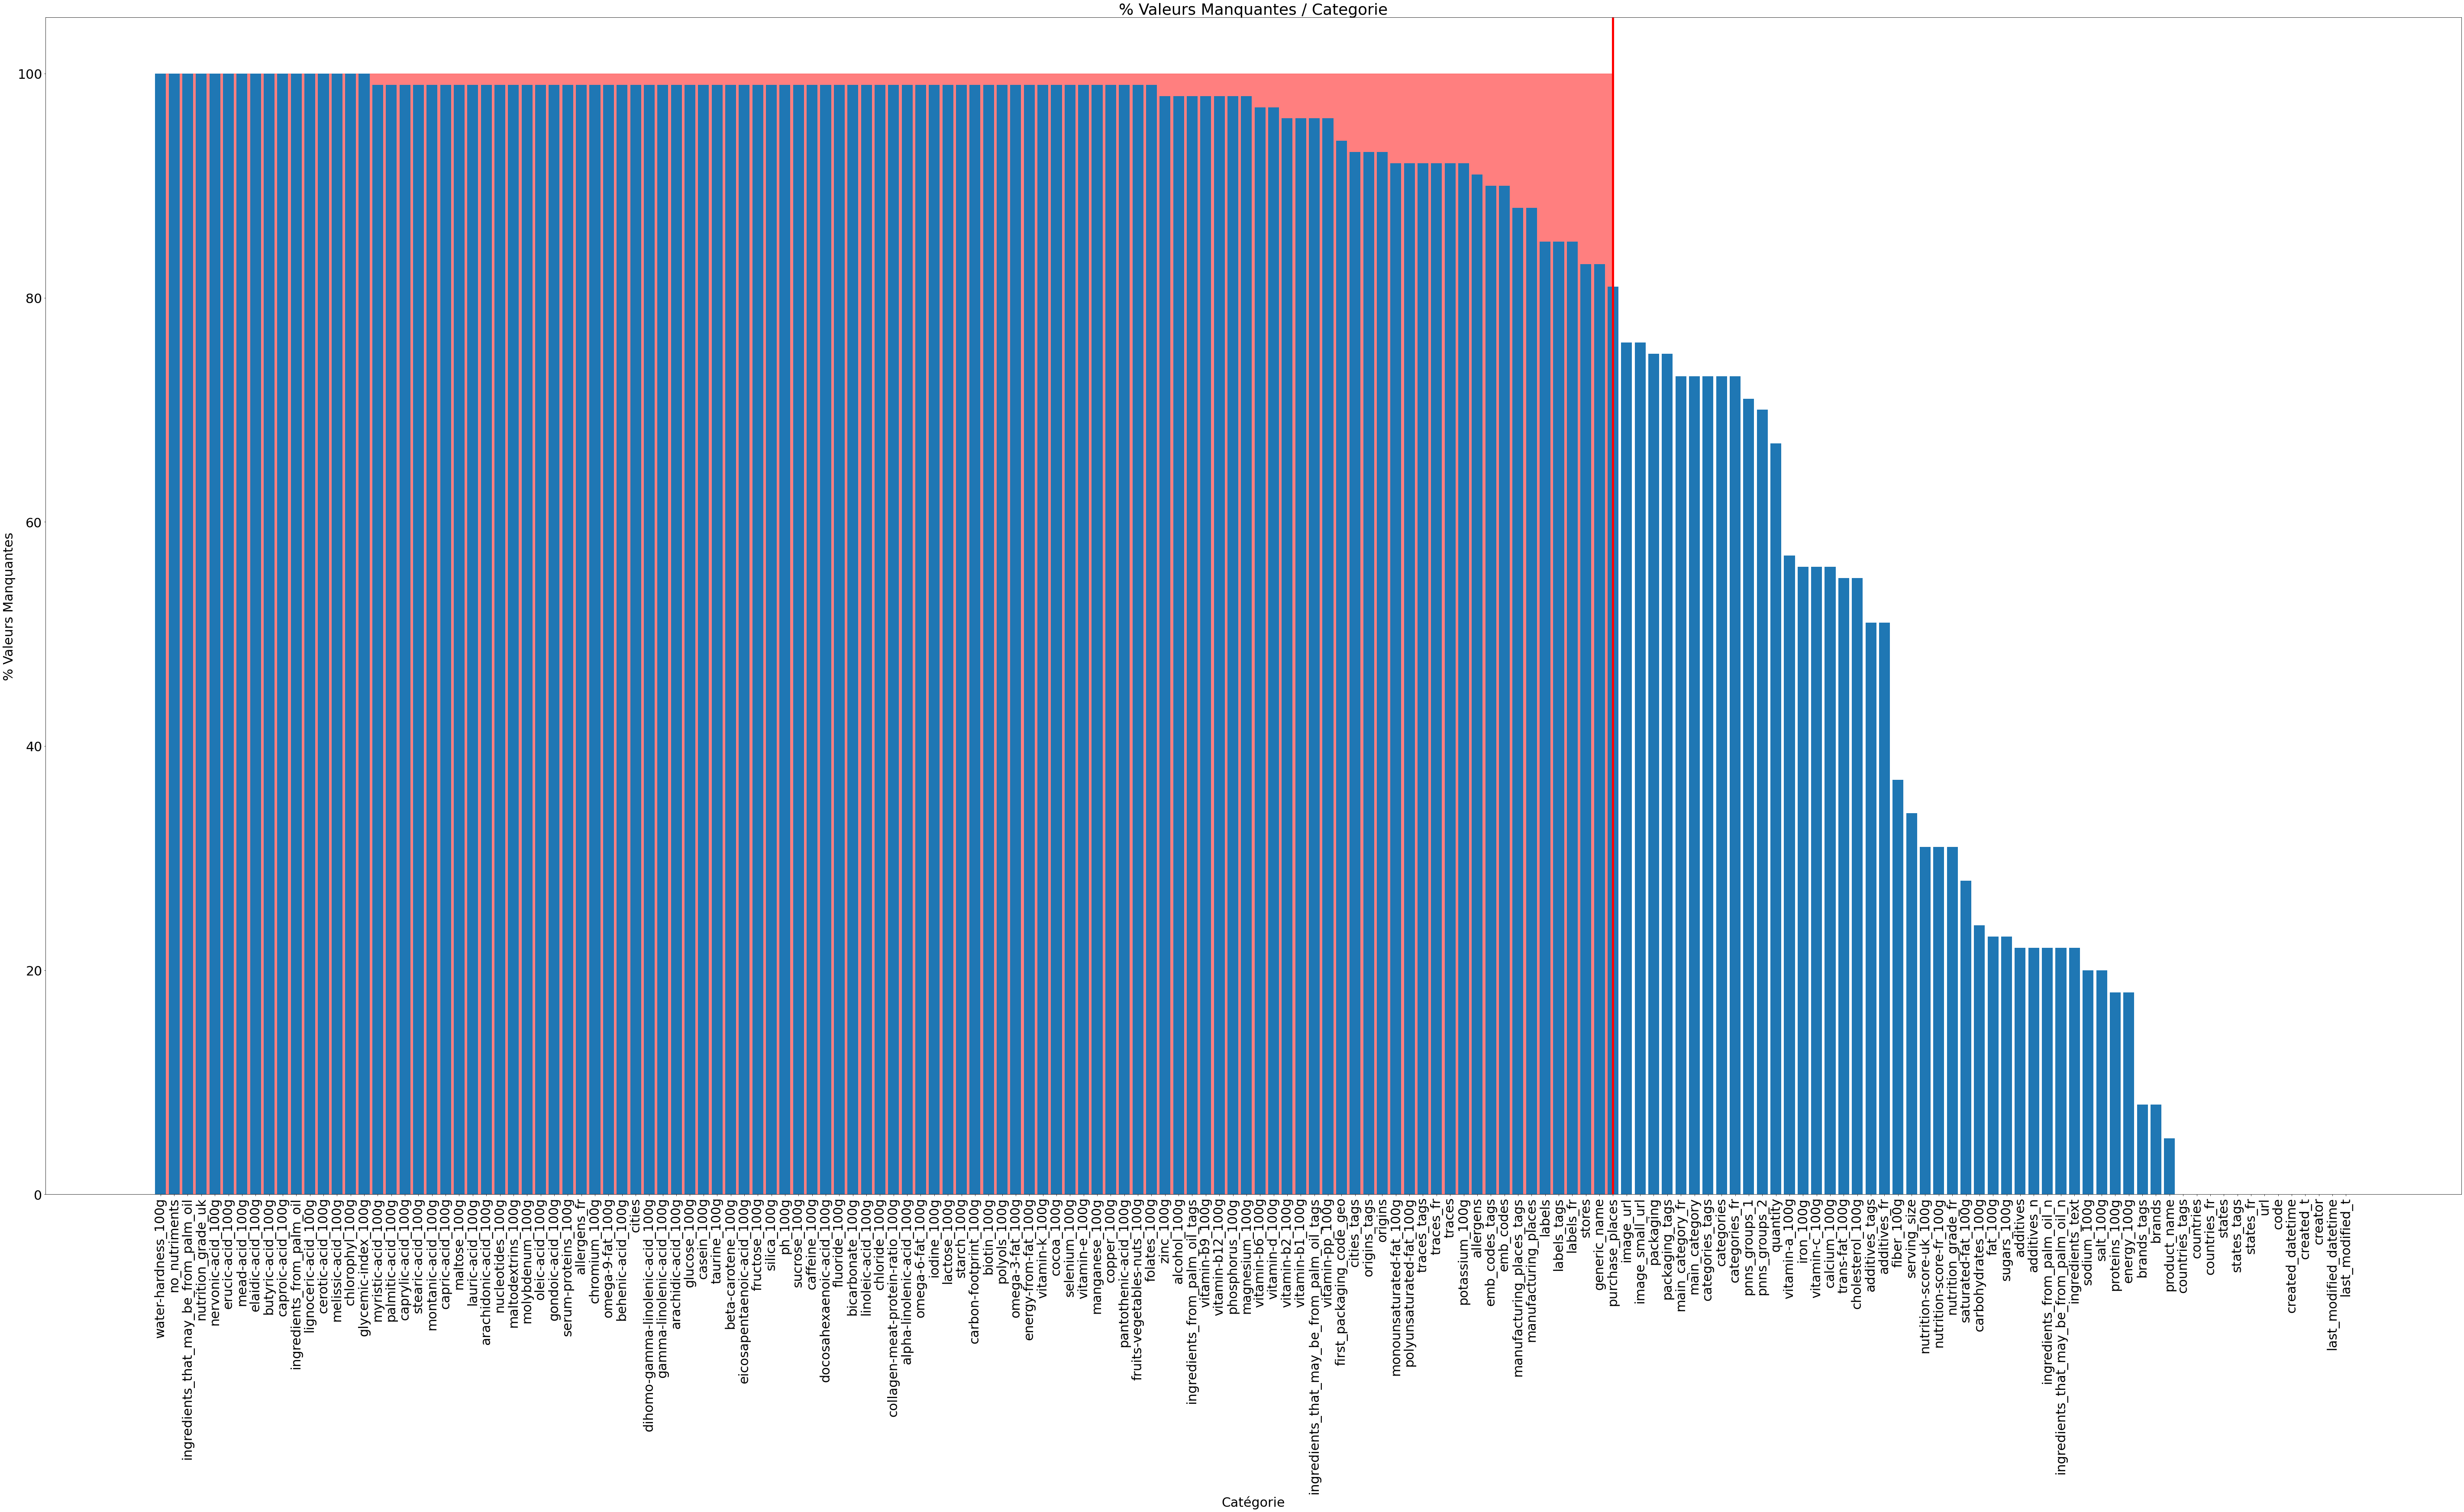

In [10]:
from matplotlib import pyplot as plt
# taille du graphique
plt.rcParams['font.size'] = '30.0'
plt.rcParams["figure.figsize"] = (100,50)
# bar chart
plt.bar(pctNA.index,pctNA)
# ligne limite des 80% de valeurs manquantes
plt.axvline(limitCountNA, color='r',lw=5)
plt.fill_betweenx(pctNA,limitCountNA,color="red",alpha=.5)

# rotation à la verticale des libelles
plt.xticks(rotation=90)

# Titre et libelles
plt.title('% Valeurs Manquantes / Categorie')
plt.xlabel('Catégorie')
plt.ylabel('% Valeurs Manquantes')

plt.show()

*Les données dans la zone rouge (à  gauche) sont toutes les données dont le taux de valeurs manquantes est supérieur à 80%.\
Ces données pourront être écartées de notre étude.*

## <font color=#FB5607>Donnees sous seuil de valeurs manquantes</font>

On ne garde donc que les colonnes ayant moins de 80% de valeurs manquantes

In [11]:
# identification des colonnes avec taux de valeurs manquantes < 81%
colonnesNA80=pctNA[pctNA<81]
colonnesNA80.index

Index(['image_url', 'image_small_url', 'packaging', 'packaging_tags',
       'main_category_fr', 'main_category', 'categories_tags', 'categories',
       'categories_fr', 'pnns_groups_1', 'pnns_groups_2', 'quantity',
       'vitamin-a_100g', 'iron_100g', 'vitamin-c_100g', 'calcium_100g',
       'trans-fat_100g', 'cholesterol_100g', 'additives_tags', 'additives_fr',
       'fiber_100g', 'serving_size', 'nutrition-score-uk_100g',
       'nutrition-score-fr_100g', 'nutrition_grade_fr', 'saturated-fat_100g',
       'carbohydrates_100g', 'fat_100g', 'sugars_100g', 'additives',
       'additives_n', 'ingredients_from_palm_oil_n',
       'ingredients_that_may_be_from_palm_oil_n', 'ingredients_text',
       'sodium_100g', 'salt_100g', 'proteins_100g', 'energy_100g',
       'brands_tags', 'brands', 'product_name', 'countries_tags', 'countries',
       'countries_fr', 'states', 'states_tags', 'states_fr', 'url', 'code',
       'created_datetime', 'created_t', 'creator', 'last_modified_datetime',

In [12]:
# filtrage
dfNA80=df[colonnesNA80.index]
dfNA80.head()

,image_url,image_small_url,packaging,packaging_tags,main_category_fr,main_category,categories_tags,categories,categories_fr,pnns_groups_1,...,states,states_tags,states_fr,url,code,created_datetime,created_t,creator,last_modified_datetime,last_modified_t
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-to-be-c...","en:to-be-completed,en:nutrition-facts-to-be-co...","A compléter,Informations nutritionnelles à com...",http://world-fr.openfoodfacts.org/produit/0000...,0000000003087,2016-09-17T09:17:46Z,1474103866,openfoodfacts-contributors,2016-09-17T09:18:13Z,1474103893
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000004530,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000004559,2017-03-09T14:32:37Z,1489069957,usda-ndb-import,2017-03-09T14:32:37Z,1489069957
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000016087,2017-03-09T10:35:31Z,1489055731,usda-ndb-import,2017-03-09T10:35:31Z,1489055731
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,"en:to-be-completed, en:nutrition-facts-complet...","en:to-be-completed,en:nutrition-facts-complete...","A compléter,Informations nutritionnelles compl...",http://world-fr.openfoodfacts.org/produit/0000...,0000000016094,2017-03-09T10:34:13Z,1489055653,usda-ndb-import,2017-03-09T10:34:13Z,1489055653


## <font color=#FB5607>Donnees avec filtrage des colonnes non significatives</font>

In [13]:
# identification des colonnes numériques et qualitatives
colonnesNum=dfNA80.select_dtypes(include=np.number).columns.tolist()
colonnesQual=dfNA80.select_dtypes(include='O').columns.tolist()

In [14]:
# filtrage des données qualitative + tri des colonnes par nombre de valeurs uniques
dfNA80ObjDesc=(dfNA80.describe(include='O')).sort_values(by='unique',axis=1,ascending=True)

# identification des colonnes qualitatives comportant peu de valeurs uniques (beaucoup de doublons)
dfNA80ObjUniq=dfNA80ObjDesc.loc[dfNA80ObjDesc.index=='unique']
dfNA80ObjUniq

,nutrition_grade_fr,pnns_groups_1,pnns_groups_2,countries_fr,countries_tags,states_fr,states,states_tags,countries,creator,...,image_url,last_modified_t,last_modified_datetime,created_t,created_datetime,additives,ingredients_text,product_name,url,code
unique,5,14,42,722,725,1021,1021,1021,1434,3535,...,75836,180495,180495,189567,189568,196069,205520,221347,320749,320749


*On va pouvoir exclure les données qualitatives qui ont très peu de valeurs uniques (nutrition_grade_fr,pnns_groups_1,pnns_groups_2)*

In [15]:
# colonnes qualitatives sans les colonnes contenant beaucoup de doublons
colonnesQual=list(set(colonnesQual)-set(['nutrition_grade_fr', 'pnns_groups_1','pnns_groups_2']))
colonnesQual

['countries_fr',
 'categories_fr',
 'states_tags',
 'countries',
 'packaging',
 'states',
 'ingredients_text',
 'last_modified_t',
 'created_t',
 'states_fr',
 'additives_tags',
 'main_category',
 'quantity',
 'product_name',
 'categories_tags',
 'main_category_fr',
 'brands',
 'code',
 'categories',
 'creator',
 'url',
 'additives',
 'packaging_tags',
 'created_datetime',
 'additives_fr',
 'countries_tags',
 'last_modified_datetime',
 'serving_size',
 'image_url',
 'image_small_url',
 'brands_tags']

In [16]:
# Dataframe dégrossi sur les données numériques et qualitatives
# Les valeurs restent brutes pour rester proche de la golden source
dfNA80[colonnesQual+colonnesNum].head()

,countries_fr,categories_fr,states_tags,countries,packaging,states,ingredients_text,last_modified_t,created_t,states_fr,...,carbohydrates_100g,fat_100g,sugars_100g,additives_n,ingredients_from_palm_oil_n,ingredients_that_may_be_from_palm_oil_n,sodium_100g,salt_100g,proteins_100g,energy_100g
0,France,NaN,"en:to-be-completed,en:nutrition-facts-to-be-co...",en:FR,NaN,"en:to-be-completed, en:nutrition-facts-to-be-c...",NaN,1474103893,1474103866,"A compléter,Informations nutritionnelles à com...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,États-Unis,NaN,"en:to-be-completed,en:nutrition-facts-complete...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...","Bananas, vegetable oil (coconut oil, corn oil ...",1489069957,1489069957,"A compléter,Informations nutritionnelles compl...",...,64.29,28.57,14.29,0.0,0.0,0.0,0.000,0.00000,3.57,2243.0
2,États-Unis,NaN,"en:to-be-completed,en:nutrition-facts-complete...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...","Peanuts, wheat flour, sugar, rice flour, tapio...",1489069957,1489069957,"A compléter,Informations nutritionnelles compl...",...,60.71,17.86,17.86,0.0,0.0,0.0,0.250,0.63500,17.86,1941.0
3,États-Unis,NaN,"en:to-be-completed,en:nutrition-facts-complete...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...","Organic hazelnuts, organic cashews, organic wa...",1489055731,1489055731,"A compléter,Informations nutritionnelles compl...",...,17.86,57.14,3.57,0.0,0.0,0.0,0.482,1.22428,17.86,2540.0
4,États-Unis,NaN,"en:to-be-completed,en:nutrition-facts-complete...",US,NaN,"en:to-be-completed, en:nutrition-facts-complet...",Organic polenta,1489055653,1489055653,"A compléter,Informations nutritionnelles compl...",...,77.14,1.43,NaN,0.0,0.0,0.0,NaN,NaN,8.57,1552.0


## <font color=#FB5607>Ecriture fichier CSV</font>

In [17]:
# sortie fichier csv 'products_clean.csv'
dfNA80[colonnesQual+colonnesNum].to_csv('products_clean.csv',index=False)
print(f"Elapsed: {time.time() - now}")

Elapsed: 39.25631594657898


## <font color=#FF006E>Reste a faire</font>

* Quelles sont les informations pertinentes pour la nutrition (voir definition wikipedia)? => FAIT
* Augmenter la taille des axes + supprimer les données avec 80% de valeurs manquantes => FAIT
* celles qu'on garde (on les complete, distinguer les types, voir les medianes, mode, distribution, type, ) => FAIT